In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.translate.bleu_score import sentence_bleu
from nltk.corpus import wordnet as wn
import re
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import docx

Stopwords = set(stopwords.words('english'))
wordlemmatizer = WordNetLemmatizer()

In [105]:
def lemmatize_words(words): # used
    lemmatized_words = []
    for word in words:
        tempList = []
        for word2 in word:
            tempList.append(wordlemmatizer.lemmatize(word2))
        lemmatized_words.append(tempList)
    return lemmatized_words

def uniqueWord(w): # used 
    w2=[]
    for word in w:
        tempList=[]
        for word2 in word:
            if tempList.count(word2)<1:
                    tempList.append(word2)
        w2.append(tempList)
    return w2

def stem_words(words):
    stemmed_words = []
    for word in words:
       stemmed_words.append(stemmer.stem(word))
    return stemmed_words
def remove_special_characters(text): # used
    regex = r'[^a-zA-Z0-9\s]'
    text = re.sub(regex,'',text)
    return text
def freq(words):
    words = [word.lower() for word in words]
    dict_freq = {}
    words_unique = []
    for word in words:
       if word not in words_unique:
           words_unique.append(word)
    for word in words_unique:
       dict_freq[word] = words.count(word)
    return dict_freq
def pos_tagging(text):
    pos_tag = nltk.pos_tag(text.split())
    pos_tagged_noun_verb = []
    for word,tag in pos_tag:
        if tag == "NN" or tag == "NNP" or tag == "NNS" or tag == "VB" or tag == "VBD" or tag == "VBG" or tag == "VBN" or tag == "VBP" or tag == "VBZ":
             pos_tagged_noun_verb.append(word)
    return pos_tagged_noun_verb

def removeStopWord(word_text):  # used
    filtered_sentence = [] 
    stop_words = set(stopwords.words('english'))   
    for w in word_text:
        tempList=[]
        for x in w:
            if x.lower() not in stop_words: 
                tempList.append(x)
        filtered_sentence.append(tempList)
    return filtered_sentence   
 
def meanOfWord(model, sentence): # used
#     posValue=nltk.pos_tag(sentence)
    posList=['CD']
    nounList=['NN','NNP','NNS','NNPS']
    value=[]
    count=0
    noun=0
    for word in sentence:
        a=model.similar_by_word(word)
        temp=[]
        for w in a:
            temp.append(w[1])
        posValue=nltk.pos_tag([word])
#         print(posValue)
        wordScore=np.mean(temp)
        if posValue[0][1] in posList:
            count=count+1
        else:
            valueIfNum=checkNum(word)
            count=count+valueIfNum
        if posValue[0][1] in nounList:
            noun=noun + .25
        value.append(wordScore)
    return np.mean(value)+count+noun

        
def checkSimilarity(originalSummary,machineSummary): # used
    ref = [originalSummary.split()]
    can = machineSummary.split()
    score = sentence_bleu(ref, can, weights=(0,0,0,0))
    
    s1= sentence_bleu(ref, can, weights=(1, 0, 0, 0))
    s2=sentence_bleu(ref, can, weights=(0.5, 0.5, 0, 0))
    s3=sentence_bleu(ref, can, weights=(0.33, 0.33, 0.33, 0))
    s4=sentence_bleu(ref, can, weights=(0.25, 0.25, 0.25, 0.25))
#     print(score)
#     print('Cumulative 1-gram: %f' % s1)
#     print('Cumulative 2-gram: %f' % s2)
#     print('Cumulative 3-gram: %f' % s3)
#     print('Cumulative 4-gram: %f' % s4)
    mean= np.mean([s1,s2,s3,s4])
    return [mean,[s1,s2,s3,s4]]
    
def checkNum(s):
    l= ['1','2','3','4','5','6','7','8','9','0']
    check =False

    for i in s:
        if i in l:
            check = True
            break
    if check == True:
        return 1
    else:
        return 0

In [230]:
# text = "Thank you for keeping keeping me updated on this issue. I'm happy to hear that the issue got resolved after all and you can now use the app in its full functionality again. Also many thanks for your suggestions. We hope to improve this feature in the future. In case you experience any further problems with the app, please don't hesitate to contact me again."
# text = "The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory’s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace. It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues, the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications one mandating the celebration of Rakshabandhan (left)and the other withdrawing the mandate (right) were issued by the Daman and Diu administration a day apart. The circular was withdrawn through a one-line order issued late in the evening by the UT’s department of personnel and administrative reforms. The circular is ridiculous. There are sensitivities involved. How can the government dictate who I should tie rakhi to we should maintain the professionalism of a workplace an official told Hindustan Times earlier in the day. She refused to be identified. The notice was issued on Daman and Diu administrator and former Gujarat home minister Praful Kodabhai Patel’s direction, sources said.Rakshabandhan, a celebration of the bond between brothers and sisters, is one of several Hindu festivities and rituals that are no longer confined of private, family affairs but have become tools to push politic al ideologies.In 2014, the year BJP stormed to power at the Centre, Rashtriya Swayamsevak Sangh (RSS) chief Mohan Bhagwat said the festival had ?national significance and should be celebrated widely to protect Hindu culture and live by the values enshrined in it. The RSS is the ideological parent of the ruling BJP. Last year, women ministers in the Modi government went to the border areas to celebrate the festival with soldiers. A year before, all cabinet ministers were asked to go to their constituencies for the festival."
# text="At least 162 passengers and 11 crew members have reported being ill on board Princess Cruises\' Caribbean Princess, according to the Centers for Disease Control and Prevention. The institute said health officers would board the ship in Houston to investigate the gastrointestinal illness, which is causing vomiting and diarrhea. The news follows reports of sickness this week on another cruise ship, this one from the Royal Caribbean line. Nearly 700 crew and passengers fell ill aboard the Royal Caribbean's Explorer of the Seas, the highest number of sick people reported on any cruise ship in two decades, CDC data show. That ship returned home Wednesday, two days earlier than expected. To compare the cruises, 5.22% of passengers on the Caribbean Princess reported being ill, versus 20.5% on the Explorer of the Seas. The outbreak on board the Caribbean Princess has been confirmed as norovirus, according to Julie Benson, a spokeswoman for Princess Cruises. Are cruise ships floating petri dishes? Noroviruses spread easily and are a common cause of gastroenteritis, which produces vomiting and diarrhea. Norovirus is also suspected on board the Explorer of the Seas, though the cause of the illness there has not been confirmed. Caribbean Princess is expected in Houston early Friday. The seven-day cruise is being cut short by one day. Sick passengers are being asked to stay in their cabins, while staff disinfect public areas such as restrooms and elevators. The decision to cut the trip short was made based on forecasts for heavy fog, not the outbreak, Benson said. CNN first learned of the stricken Princess ship from a Twitter post by the Houston Chronicle. Royal Caribbean cruise ship returns home - with a sickness record CNN's Miriam Falco contributed to this report."

doc = docx.Document('C:/Users/Haider/Article/Business/133.docx')
text = []
for paragraph in doc.paragraphs:
    text.append(paragraph.text)
text = ' '.join(text)  

doc = docx.Document('C:/Users/Haider/Article/Business/summary/133.docx')
originalSummary = []
for paragraph in doc.paragraphs:
    originalSummary.append(paragraph.text)
originalSummary = ' '.join(originalSummary)  

sentences = sent_tokenize(text) # 1: sent tokenize
text_noSpecial_character = remove_special_characters(str(text)) # 2: remove special character:
# text_noSpecial_character = re.sub(r'\d+', '', text_noSpecial_character)
word_text = [[text_noSpecial_character for text_noSpecial_character in sentences.split()] for sentences in sentences] # 3: word token
stop_text= removeStopWord(word_text) # 4: remove stop words
unique_text= uniqueWord(stop_text)   # 5: remove duplicate words
lemma_text = lemmatize_words(unique_text) # 6: lemmatization

# there may be an issue about the unique word. i have to check which gives better accuracy
# kmean cluster using full sentence or kmean cluster usnig unique words in sentence


In [231]:
model = Word2Vec(lemma_text, min_count=1,sg=1)
def vectorizer(sent,m):
    vec=[]
    numw=0
    for w in sent:
        try:
            if numw==0:
                vec=m[w]
            else:
                vec=np.add(vec,m[w])
            numw+=1;
        except:
            pass
    return np.asarray(vec)/numw
    
l=[]
for i in lemma_text:
    l.append(vectorizer(i,model))
#     print(vectorizer(i,model))

x= np.array(l)


C:\Users\Haider\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\Haider\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


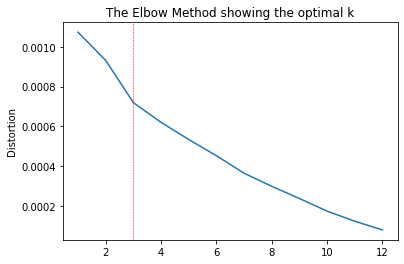

In [232]:
wcss=[]
for i in range(1,13):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.axvline(x=3,color='red',linestyle='--',linewidth=.5)

In [241]:
n_cluster=3
kmeans= KMeans(n_clusters=n_cluster)
labels=kmeans.fit_predict(x)
print(labels)
print(type(labels))
labelList= labels.tolist()
max = 0
res = labelList[0] # cluster with maximum frequency
for i in labelList: 
    freq = labelList.count(i) 
    if freq > max: 
        max = freq 
        res = i 
# print(res)        
score=[]
for index, sentence in enumerate(lemma_text):
    i = lemma_text.index(sentence)
    if labels[index] == res:  
        meanScore= meanOfWord(model,sentence)
        print(str(labels[index])+ ":"+ str(sentence)+ str(meanScore) )
        temp = [i,meanScore]
        score.append(temp)
#     print(meanOfWord(model,sentence))
print(score)

[1 1 1 0 1 1 1 1 1 1 1 1 2 1]
<class 'numpy.ndarray'>
1:['Cameroon', 'say', 'widespread', 'corruption', 'finance', 'ministry', 'cost', '1bn', 'CFA', 'franc', '($2m;', 'Â£1m)', 'month.']5.69517821520567
1:['500', 'official', 'accused', 'either', 'awarding', 'extra', 'money', 'claiming', 'salary', '"non-existent"', 'workers.']2.4380367582494564
1:['Prime', 'Minister', 'Ephraim', 'Inoni,', 'vowed', 'tackle', 'corruption', 'came', 'office', 'last', 'year,', 'said', 'found', 'guilty', 'would', 'face', 'tough', 'punishments.']3.1889746520254345
1:['prime', "minister's", 'office', 'said', 'alleged', 'fraud', 'uncovered', 'investigation', 'payroll', 'ministry.']1.9445608857274055
1:['certain', 'cases,', 'staff', 'said', 'lied', 'rank', 'delayed', 'retirement', 'order', 'boost', 'earnings.']2.201454093239524
1:['prime', "minister's", 'office', 'said', 'auditor', 'found', '"irregularities', 'career', 'structure', 'certain', 'civil', 'servants".']2.438472228497267
1:['added', 'staff', 'question',

C:\Users\Haider\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).



1:['report', 'compiled', 'anti-corruption', 'body', 'Transparency', 'International', '2003,', 'graft', 'said', '"pervasive"', 'Cameroon.']3.187947913327
[[0, 5.69517821520567], [1, 2.4380367582494564], [2, 3.1889746520254345], [4, 1.9445608857274055], [5, 2.201454093239524], [6, 2.438472228497267], [7, 1.4399480692214435], [8, 3.1938624624358978], [9, 3.4398658991298254], [10, 2.936990144263421], [11, 2.445330685625474], [13, 3.187947913327]]


In [242]:
score.sort(key=lambda x:x[1],reverse=True)
score

[[0, 5.69517821520567],
 [9, 3.4398658991298254],
 [8, 3.1938624624358978],
 [2, 3.1889746520254345],
 [13, 3.187947913327],
 [10, 2.936990144263421],
 [11, 2.445330685625474],
 [6, 2.438472228497267],
 [1, 2.4380367582494564],
 [5, 2.201454093239524],
 [4, 1.9445608857274055],
 [7, 1.4399480692214435]]

In [243]:
newScore =[]
length=round(len(sentences)/3)+1
for i in range(0,length):
    if i == len(score):
        break
    newScore.append(score[i])
print(newScore)
newScore.sort()
newScore

[[0, 5.69517821520567], [9, 3.4398658991298254], [8, 3.1938624624358978], [2, 3.1889746520254345], [13, 3.187947913327], [10, 2.936990144263421]]


[[0, 5.69517821520567],
 [2, 3.1889746520254345],
 [8, 3.1938624624358978],
 [9, 3.4398658991298254],
 [10, 2.936990144263421],
 [13, 3.187947913327]]

In [108]:
def summaryEvaluate(sentences, newScore, originalSummary):
    numOfSentence =round(len(sentences)/3)
    mySummary = ''
    for i in range (0, numOfSentence ):
    #     st.join(sentences[i])
        mySummary=mySummary+sentences[newScore[i][0]]+' '
    c1=checkSimilarity(originalSummary,mySummary)
    numOfSentence2 =round(len(sentences)/3)+1
    mySummary2 = ''
    for i in range (0, numOfSentence2 ):
        mySummary2=mySummary2+sentences[newScore[i][0]]+' '
    c2=checkSimilarity(originalSummary,mySummary2)
    if c1[0]>c2[0]:
        print('Cumulative 1-gram: %f' % c1[1][0])
        print('Cumulative 2-gram: %f' % c1[1][1])
        print('Cumulative 3-gram: %f' % c1[1][2])
        print('Cumulative 4-gram: %f' % c1[1][3])
        print('cumulative: ',str(c1[0]))
        print(mySummary)  
        print('---------------------------------------')
        print('line of my summary: '+ str(numOfSentence))
        print('---------------------------------------')
        
    else: 
        print('Cumulative 1-gram: %f' % c2[1][0])
        print('Cumulative 2-gram: %f' % c2[1][1])
        print('Cumulative 3-gram: %f' % c2[1][2])
        print('Cumulative 4-gram: %f' % c2[1][3])
        print('cumulative: ',str(c2[0]))
        print(mySummary2)  
        print('---------------------------------------')
        print('line of my summary: '+ str(numOfSentence2))
        print('---------------------------------------')
    
    print(originalSummary)
    print('---------------------------------------')
    print('line of original summary: '+str(len(sent_tokenize(originalSummary))))
    print('---------------------------------------')
    print('text line: '+str(len(sentences)))


In [244]:
summaryEvaluate(sentences,newScore,originalSummary)

Cumulative 1-gram: 0.751773
Cumulative 2-gram: 0.732790
Cumulative 3-gram: 0.720844
Cumulative 4-gram: 0.707058
cumulative:  0.7281159515868169
Cameroon says widespread corruption in its finance ministry has cost it 1bn CFA francs ($2m; Â£1m) a month. Prime Minister Ephraim Inoni, who vowed to tackle corruption when he came to office last year, said those found guilty would face tough punishments. Fidelis Nanga, a journalist based in the Cameroon capital Yaounde, said the government was considering taking criminal action against those found guilty and forcing them to repay any money owed. "The prime minister has given instructions for exemplary penalties to be meted out against the accused and their accomplices if found guilty," he told the BBC's Network Africa programme. Mr Inoni launched an anti-corruption drive in December after foreign investors criticised a lack of transparency in the country's public finances. In a report compiled by anti-corruption body Transparency Internationa

In [96]:
numOfSentence =round(len(sentences)/3)+1
mySummary = ''
for i in range (0, numOfSentence ):
#     st.join(sentences[i])
    mySummary=mySummary+sentences[newScore[i][0]]+' '
print(mySummary)  
print('---------------------------------------')
print('line of my summary: '+ str(numOfSentence))
print('---------------------------------------')
print(originalSummary)
print('---------------------------------------')
print('line of original summary: '+str(len(sent_tokenize(originalSummary))))
print('---------------------------------------')
print('text line: '+str(len(sentences)))



ID theft occurs when criminals use someone else's personal information to steal credit or commit other crimes. The report marks the fifth year in a row in which identity fraud has topped the table. The biggest slice of the 246,570 ID fraud cases reported - almost 30% - concerned abuses of people's credit. Misusing someone's identity to claim new credit cards or loans comprised 16.5% of the total, with almost 12% coming from false claims on existing credit. Catalogue and home-shopping frauds were next in line, accounting for 8% of total complaints, while concerns about internet services and computers - including spyware found on people's PCs and undisclosed charges for websites - amounted to 6% of complaints. 
---------------------------------------
line of my summary: 5
---------------------------------------
The biggest slice of the 246,570 ID fraud cases reported - almost 30% - concerned abuses of people's credit. The total cost of fraud reported by consumers was $546m (Â£290m). Inte

In [97]:
cumulative=checkSimilarity(originalSummary,mySummary)
print(cumulative)

Cumulative 1-gram: 0.572650
Cumulative 2-gram: 0.530460
Cumulative 3-gram: 0.512779
Cumulative 4-gram: 0.495479
0.527842017033801


0.40519059326622675
